In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [47]:
import catboost

In [48]:
data=pd.read_csv(r"C:\ml\da\PUBG_Game_Prediction_data.csv")

In [49]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,6)

In [50]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [52]:
data.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [53]:
data.shape

(4446966, 29)

In [54]:
data[data['winPlacePerc'].isnull()].index

Index([2744604], dtype='int64')

In [55]:
data=data.drop(2744604,axis=0)

In [56]:
data['playesjoined']=data.groupby("matchId")['matchId'].transform("count")

<Axes: xlabel='playesjoined', ylabel='count'>

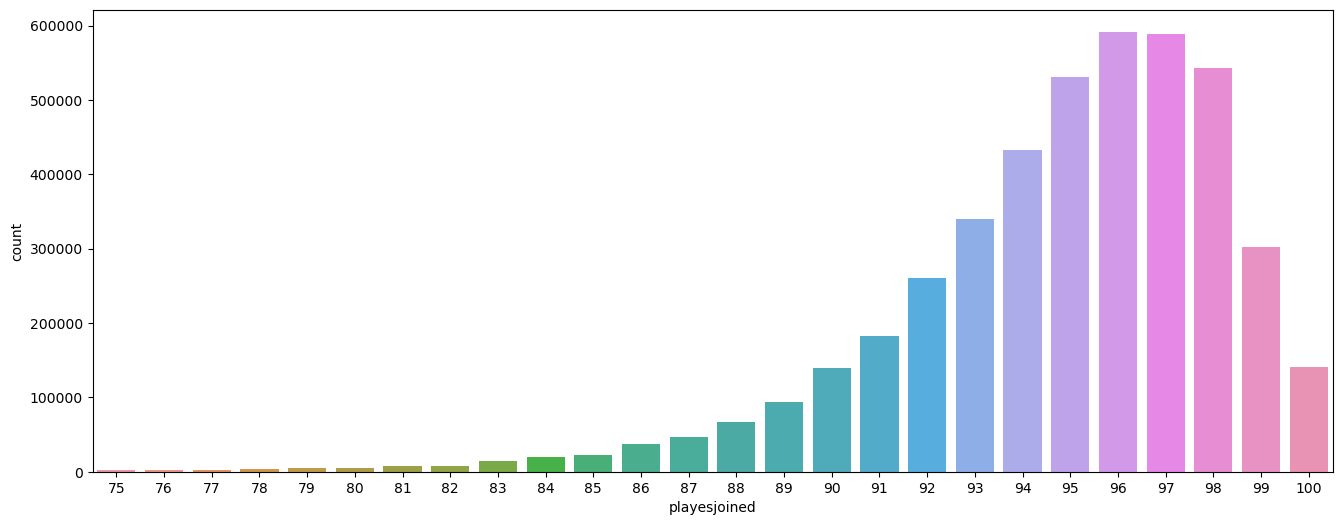

In [57]:
sns.countplot(data=data[data['playesjoined']>=75],x="playesjoined")

In [58]:
data['total_walk']=data['rideDistance']+data['walkDistance']+data['swimDistance']

In [59]:
data['bot_used']=(data['total_walk']==0)&data['kills']>0

In [60]:
data=data[data['bot_used']==False]

In [61]:
data.shape

(4446008, 32)

In [62]:
data[data['roadKills']>5].shape

(46, 32)

In [63]:
data.drop(data[data['roadKills']>5].index,axis=0,inplace=True)

In [64]:
# sns.countplot(data=data[data['kills']>=15],x='kills')

In [65]:
data['headshotKills_rate']=data['headshotKills']/data['kills']


In [66]:
data.drop(data[(data['headshotKills_rate']==1)&(data['kills']>=5)].index,axis=0,inplace=True)

In [67]:
# sns.distplot(data['headshotKills'])


In [68]:
# sns.distplot(data['longestKill'],bins=50)

In [69]:
data.drop(data[data['longestKill']>=500].index,axis=0,inplace=True)

In [70]:
# sns.distplot(data['weaponsAcquired'])

In [71]:
data.drop(data[data['weaponsAcquired']>=15].index,axis=0,inplace=True)

In [72]:
data.shape

(4436347, 33)

In [73]:
data['headshotKills_rate']=data['headshotKills_rate'].fillna(0)
y=data['bot_used']
data.drop("bot_used",axis=1,inplace=True)

In [74]:
x=data['matchType']
data.drop("matchType",axis=1,inplace=True)


In [75]:
# plt.figure(figsize=[30,30])
# sns.heatmap(data.iloc[:,3:].corr())

In [76]:
normalising_factor = (100 - data['playesjoined']/100)+1

In [77]:
data['killsNorm'] = data['kills'] * normalising_factor
data['damageDealtNorm'] = data['damageDealt'] * normalising_factor
data['maxPlaceNorm'] = data['maxPlace'] * normalising_factor
data['matchDurationNorm'] = data['matchDuration'] * normalising_factor


data['traveldistance'] = data['walkDistance'] + data['swimDistance'] + data['rideDistance']
data['healsnboosts'] = data['heals'] + data['boosts']
data['assist'] = data['assists'] + data['revives']
data['matchType']=x
data['bot_used']=y

In [78]:
data = data.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [79]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,headshotKills_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist,matchType,bot_used
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0,squad-fpp,False
1,0,0,57,0,0,0.00,25,1484,0,0,...,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0,squad-fpp,False
2,0,0,47,0,0,0.00,47,1491,0,0,...,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1,duo,False
3,0,0,75,0,0,0.00,30,1408,0,0,...,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0,squad-fpp,False
4,0,0,45,0,1,58.53,95,1560,0,0,...,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0,solo-fpp,False


In [80]:
x=data.drop(['winPlacePerc'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4436347 entries, 0 to 4446965
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   DBNOs               int64  
 1   headshotKills       int64  
 2   killPlace           int64  
 3   killPoints          int64  
 4   killStreaks         int64  
 5   longestKill         float64
 6   numGroups           int64  
 7   rankPoints          int64  
 8   roadKills           int64  
 9   teamKills           int64  
 10  vehicleDestroys     int64  
 11  weaponsAcquired     int64  
 12  winPoints           int64  
 13  winPlacePerc        float64
 14  playesjoined        int64  
 15  total_walk          float64
 16  headshotKills_rate  float64
 17  killsNorm           float64
 18  damageDealtNorm     float64
 19  maxPlaceNorm        float64
 20  matchDurationNorm   float64
 21  traveldistance      float64
 22  healsnboosts        int64  
 23  assist              int64  
 24  matchType           object 
 

In [81]:
y=data['winPlacePerc']
x=pd.get_dummies(x,columns=['matchType','bot_used'])

In [83]:
data['matchType'].value_counts()

matchType
squad-fpp           1754678
duo-fpp              995972
squad                625246
solo-fpp             536181
duo                  313171
solo                 181443
normal-squad-fpp      13305
crashfpp               6274
normal-duo-fpp         5016
flaretpp               2497
normal-solo-fpp         883
flarefpp                717
crashtpp                367
normal-squad            321
normal-duo              145
normal-solo             131
Name: count, dtype: int64

In [84]:
sc=StandardScaler()
x


StandardScaler()

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [89]:
import catboost as cb
train_data=cb.Pool(x_train,y_train)
test_data=cb.Pool(x_test,y_test)

In [92]:
model=cb.CatBoostRegressor(loss_function="RMSE")


In [96]:
grid={"iterations":[10,15],
     "learning_rate":[0.3,0.1],
     "depth":[2,4,6]}
model.grid_search(grid,train_data)

0:	learn: 0.4129392	test: 0.4128393	best: 0.4128393 (0)	total: 640ms	remaining: 5.76s
1:	learn: 0.3121276	test: 0.3121423	best: 0.3121423 (1)	total: 1.15s	remaining: 4.6s
2:	learn: 0.2451231	test: 0.2452305	best: 0.2452305 (2)	total: 1.63s	remaining: 3.8s
3:	learn: 0.2020994	test: 0.2022606	best: 0.2022606 (3)	total: 2.12s	remaining: 3.17s
4:	learn: 0.1750283	test: 0.1752298	best: 0.1752298 (4)	total: 2.53s	remaining: 2.53s
5:	learn: 0.1592926	test: 0.1595238	best: 0.1595238 (5)	total: 3.08s	remaining: 2.06s
6:	learn: 0.1501165	test: 0.1503424	best: 0.1503424 (6)	total: 3.47s	remaining: 1.49s
7:	learn: 0.1435607	test: 0.1438182	best: 0.1438182 (7)	total: 3.86s	remaining: 964ms
8:	learn: 0.1396308	test: 0.1398817	best: 0.1398817 (8)	total: 4.28s	remaining: 476ms
9:	learn: 0.1365129	test: 0.1367645	best: 0.1367645 (9)	total: 4.8s	remaining: 0us

bestTest = 0.1367644842
bestIteration = 9

0:	loss: 0.1367645	best: 0.1367645 (0)	total: 10.4s	remaining: 1m 54s
0:	learn: 0.5127300	test: 0.512

2:	learn: 0.4230893	test: 0.4229744	best: 0.4229744 (2)	total: 2.06s	remaining: 8.25s
3:	learn: 0.3859776	test: 0.3858946	best: 0.3858946 (3)	total: 2.79s	remaining: 7.67s
4:	learn: 0.3527910	test: 0.3527313	best: 0.3527313 (4)	total: 3.48s	remaining: 6.97s
5:	learn: 0.3232751	test: 0.3232486	best: 0.3232486 (5)	total: 4.28s	remaining: 6.42s
6:	learn: 0.2971764	test: 0.2971702	best: 0.2971702 (6)	total: 5.02s	remaining: 5.74s
7:	learn: 0.2740526	test: 0.2740681	best: 0.2740681 (7)	total: 5.78s	remaining: 5.06s
8:	learn: 0.2536331	test: 0.2536716	best: 0.2536716 (8)	total: 6.59s	remaining: 4.39s
9:	learn: 0.2355776	test: 0.2356241	best: 0.2356241 (9)	total: 7.34s	remaining: 3.67s
10:	learn: 0.2197437	test: 0.2198014	best: 0.2198014 (10)	total: 8.03s	remaining: 2.92s
11:	learn: 0.2058446	test: 0.2059132	best: 0.2059132 (11)	total: 8.7s	remaining: 2.17s
12:	learn: 0.1934847	test: 0.1935650	best: 0.1935650 (12)	total: 9.44s	remaining: 1.45s
13:	learn: 0.1823806	test: 0.1824607	best: 0.1824

10:	learn: 0.1038279	test: 0.1036860	best: 0.1036860 (10)	total: 9.83s	remaining: 3.57s
11:	learn: 0.1023410	test: 0.1021965	best: 0.1021965 (11)	total: 10.7s	remaining: 2.66s
12:	learn: 0.1011159	test: 0.1009647	best: 0.1009647 (12)	total: 11.5s	remaining: 1.76s
13:	learn: 0.0990972	test: 0.0989501	best: 0.0989501 (13)	total: 12.3s	remaining: 876ms
14:	learn: 0.0981103	test: 0.0979633	best: 0.0979633 (14)	total: 13.3s	remaining: 0us

bestTest = 0.09796329791
bestIteration = 14

Training on fold [2/3]
0:	learn: 0.4067758	test: 0.4067018	best: 0.4067018 (0)	total: 1.51s	remaining: 21.1s
1:	learn: 0.2997686	test: 0.2997701	best: 0.2997701 (1)	total: 3.69s	remaining: 24s
2:	learn: 0.2272510	test: 0.2272508	best: 0.2272508 (2)	total: 4.78s	remaining: 19.1s
3:	learn: 0.1808063	test: 0.1808385	best: 0.1808385 (3)	total: 5.8s	remaining: 15.9s
4:	learn: 0.1505074	test: 0.1505996	best: 0.1505996 (4)	total: 6.94s	remaining: 13.9s
5:	learn: 0.1317100	test: 0.1318449	best: 0.1318449 (5)	total: 8.3

{'params': {'depth': 6, 'learning_rate': 0.3, 'iterations': 15},
 'cv_results': defaultdict(list,
             {'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
              'test-RMSE-mean': [0.40688928329105223,
               0.29970250572643,
               0.22748528620245592,
               0.18091838188290033,
               0.15108052948959916,
               0.13268962280459087,
               0.12153151782108036,
               0.11455022239845795,
               0.1098055750647921,
               0.10627957339380735,
               0.10379353625917698,
               0.1020663363301525,
               0.10063768146540446,
               0.09901358620262836,
               0.09797202646035687],
              'test-RMSE-std': [0.0002114787750422196,
               0.0003867496741427495,
               0.0002047870241017729,
               7.881166794925237e-05,
               0.0004215596345984817,
               0.0007687219204405518,
               0.000491

In [97]:
pred=model.predict(x_test)

In [101]:
from sklearn.metrics import r2_score
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.10
R2: 0.90
